In [1]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data= pd.read_excel('all_samples_clean.xlsx',sheet_name='Sheet1')
data.drop(['BASIC_entity_name','BASIC_year'],axis=1,inplace=True)   

In [3]:
rf = RandomForestClassifier()

In [11]:
train.columns

Index(['ASSETAB_GOODWILLQUALITY', 'ASSETAB_LONGRECEIVABLES',
       'ASSETAB_PREPAIDQUALITY', 'ASSETAB_SOFTASSETS', 'ASSETAB_STOCK',
       'CASHAB_DEPOSIT', 'CASHAB_LIMITEDCASH', 'CASHAB_OPERATINGCASH',
       'COSTAB_ACCOUNTING', 'COSTAB_ACCRUALS', 'COSTAB_PERIODCOST',
       'COSTAB_PREPAIDEXPENSES', 'COSTAB_PROFITGROWTH', 'COSTAB_SHOPPINGCASH',
       'DEBTAB_DEBTSTRUCTURE', 'DEBTAB_FINANCINGSTRUCTURE',
       'DILEMMAAB_FREECASHFLOW', 'DILEMMAAB_NEGAREVENUE', 'DILEMMAAB_OPCASH',
       'FINANCINGAB_HIGHCASHDEBT', 'FINANCINGAB_HIGHINTEREST',
       'FINANCINGAB_IDLEFUNDS', 'INVESTMENTAB_ASSETDISPOSAL',
       'INVESTMENTAB_CONSTRUCTIONINVEST', 'INVESTMENTAB_INVESTSTRATEGY',
       'REVENUEAB_CASHREVENUE', 'REVENUEAB_COSTREVENUE',
       'REVENUEAB_REVENUEGROWTH', 'REVENUEAB_SELLINGEXPENSES',
       'REVENUEAB_SELLONCREDITQUALITY', 'REVENUEAB_SELLONCREDITRATIO',
       'REVENUEAB_TAXREVENUE', 'RINVESTAB_COMBINEDPROFIT',
       'RINVESTAB_GOODWILLQUALITY', 'RINVESTAB_GROUP',
       '

 1. INVESTMENTAB_INVESTSTRATEGY    0.774568
 2. COSTAB_ACCOUNTING              0.056385
 3. REVENUEAB_REVENUEGROWTH        0.044423
 4. FINANCINGAB_HIGHINTEREST       0.039977
 5. COSTAB_PREPAIDEXPENSES         0.030421
 6. DEBTAB_FINANCINGSTRUCTURE      0.029877
 7. DILEMMAAB_NEGAREVENUE          0.024349


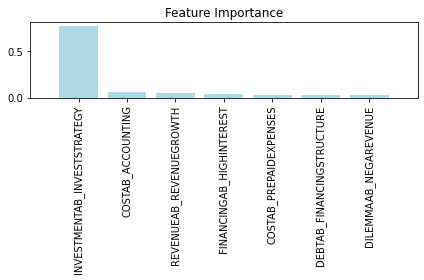

In [22]:
col ='INVESTMENTAB_CONSTRUCTIONINVEST'

train =data
features = train.corr().columns[train.corr()[col].abs() > 0.1]
features = features.drop(col)


#使用随机森林模型进行拟合的过程
X_train = train[features]
y_train = train[col]
feat_labels = X_train.columns


rf = RandomForestRegressor(n_estimators=100,max_depth=None)
rf_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('rf', rf)])
rf_pipe.fit(X_train, y_train)

f = rf_pipe.__getitem__('rf')
importance = rf.feature_importances_
importance 

imp_result = np.argsort(importance)[::-1][:10]


#按重要性从高到低输出属性列名和其重要性
for i in range(len(imp_result)):
    print("%2d. %-*s %f" % (i + 1, 30, feat_labels[imp_result[i]], importance[imp_result[i]]))

#对属性列，按属性重要性从高到低进行排序
feat_labels = [feat_labels[i] for i in imp_result]
#绘制特征重要性图像
plt.title('Feature Importance')
plt.bar(range(len(imp_result)), importance[imp_result], color='lightblue', align='center')
plt.xticks(range(len(imp_result)), feat_labels, rotation=90)
plt.xlim([-1, len(imp_result)])
plt.tight_layout()